In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove6b100dtxt/glove.6B.100d.txt
/kaggle/input/ass2-anlp/train.csv
/kaggle/input/ass2-anlp/test.csv


# TEXT PREPROCESSING

In [3]:
# import resources
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')  # Make sure you have the punkt tokenizer data downloaded
%matplotlib inline
import csv
import re
import random
import copy

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:

# Initialize empty lists to store the data
class_index_train = []
description_train = []
class_index_train_elmo = []
description_train_elmo = []

# Specify the path to your CSV file
csv_file_path = '/kaggle/input/ass2-anlp/train.csv'

# Open and read the CSV file
with open(csv_file_path, 'r', newline='', encoding='utf-8') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Skip the header row if it exists
    next(csv_reader, None)
    
    # Iterate through the rows and extract data
    for row in csv_reader:
        class_index = row[0].strip()  # Extract and strip the Class Index
        description = row[1].strip()  # Extract and strip the Description
        
        # Append the data to their respective lists
        class_index_train.append(class_index)
        description_train.append(description)
        class_index_train_elmo.append(class_index)
        description_train_elmo.append(description)

# Now, class_index_list contains the "Class Index" values, and description_list contains the preprocessed "Description" values.


In [60]:

# Initialize empty lists to store the data
class_index_test = []
description_test = []


# Specify the path to your CSV file
csv_file_path = '/kaggle/input/ass2-anlp/test.csv'

# Open and read the CSV file
with open(csv_file_path, 'r', newline='', encoding='utf-8') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Skip the header row if it exists
    next(csv_reader, None)
    
    # Iterate through the rows and extract data
    for row in csv_reader:
        class_index = row[0].strip()  # Extract and strip the Class Index
        description = row[1].strip()  # Extract and strip the Description
        
        # Append the data to their respective lists
        class_index_test.append(class_index)
        description_test.append(description)


# Now, class_index_list contains the "Class Index" values, and description_list contains the preprocessed "Description" values.


In [61]:
description_test[:10]

["Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.",
 'SPACE.com - TORONTO, Canada -- A second\\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\\privately funded suborbital space flight, has officially announced the first\\launch date for its manned rocket.',
 'AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.',
 "AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.",
 "AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first r

In [62]:
text = ' '.join(description_train_elmo)
textt = ' '.join(description_test)


In [8]:
words = word_tokenize(text)


In [63]:
words = re.split(r'(?<!\\)\\', text)
wordss = re.split(r'(?<!\\)\\', textt)


In [64]:
wordss[0:10]

["Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul. SPACE.com - TORONTO, Canada -- A second",
 'team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for',
 'privately funded suborbital space flight, has officially announced the first',
 'launch date for its manned rocket. AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins. AP - It\'s barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar. AP - Southern California\'s smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation\'s first rules

In [65]:
words = [nltk.word_tokenize(sentence) for sentence in words]
wordss = [nltk.word_tokenize(sentence) for sentence in wordss]


In [66]:
wordss[1:2]


[['team',
  'of',
  'rocketeers',
  'competing',
  'for',
  'the',
  '#',
  '36',
  ';',
  '10',
  'million',
  'Ansari',
  'X',
  'Prize',
  ',',
  'a',
  'contest',
  'for']]

In [67]:
elmo_token = copy.deepcopy(wordss)  # Create a deep copy


padding

In [68]:
max_length = max(elmo_token, key=len)
print(len(max_length))

3546


In [69]:
pad_token = '<pad>'
desired_length = 50

# Iterate through each sentence and pad or truncate it
padded_list = []
for sentence in elmo_token:
    if len(sentence) >= desired_length:
        # If the sentence is longer than or equal to the desired length, truncate it
        padded_sentence = sentence[:desired_length]
    else:
        # Calculate the number of padding tokens needed
        num_padding = desired_length - len(sentence)
        
        # Pad the sentence with <pad> tokens
        padded_sentence = sentence + [pad_token] * num_padding
    
    # Append the padded or truncated sentence to the new list
    padded_list.append(padded_sentence)


In [70]:
words = [word for sublist in words for word in sublist]

In [71]:
for word in words:
    word.lower()

In [72]:
words = [word for word in words if word not in string.punctuation]

In [73]:
words.append('unk')

In [74]:
vocab = set(words)

In [75]:
import numpy as np

# Path to the GloVe pre-trained word vectors file (adjust the path as needed)
glove_file_path = '/kaggle/input/glove6b100dtxt/glove.6B.100d.txt'

# Load GloVe word vectors into a dictionary
glove_embeddings = {}
with open(glove_file_path, 'r', encoding='utf-8') as glove_file:
    for line in glove_file:
        parts = line.split()
        word = parts[0]
        vector = np.array(parts[1:], dtype=np.float32)
        glove_embeddings[word] = vector

# Initialize an empty embedding matrix
embedding_dim = 100  # Adjust the dimension based on the GloVe file you're using
embedding_matrix = np.zeros((len(vocab), embedding_dim))

# Fill the embedding matrix with GloVe embeddings for words in your vocab
for i, word in enumerate(vocab):
    if word in glove_embeddings:
        embedding_matrix[i] = glove_embeddings[word]

# Now, embedding_matrix contains the pre-trained word embeddings for words in your vocab.
# You can use this matrix as the initial weights for your embedding layer in future tasks.


In [76]:
len(embedding_matrix)

93747

In [77]:
# Create word-to-index and index-to-word dictionaries
word_to_index = {word: index for index, word in enumerate(vocab)}
index_to_word = {index: word for index, word in enumerate(vocab)}

# Convert tokenized words to their indices with respect to the embedding layer
word_indices = [word_to_index[word] if word in vocab else word_to_index['<UNK>'] for word in words]


In [78]:
padded_lists = []
for sentence in padded_list:
    padded_lists.append([word_to_index[word] if word in vocab else word_to_index['unk'] for word in sentence])


In [79]:
n = 7  # Define the n-gram size (6 + 1)

# Initialize a list to store input and target pairs
input_target_pairs = []

# Create input and target pairs
for i in range(len(word_indices) - n + 1):
    input_indices = word_indices[i:i+6]
    target_index = word_indices[i+6]
    input_target_pairs.append((input_indices, target_index))

In [80]:
len(input_target_pairs)

3809460

In [81]:
class ELMO(nn.Module):

    def __init__(self, embedding_matrix, hidden_dim, vocab_size, mode, length ):
        super(ELMO, self).__init__()

        self.hidden_dim = hidden_dim

        # Embedding layer with pretrained embeddings
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix)

        # First LSTM layer
        self.lstm1_forward = nn.LSTM(input_size=embedding_matrix.shape[1], hidden_size=hidden_dim, batch_first=True)

        # Second LSTM layer
        self.lstm2_forward = nn.LSTM(input_size=hidden_dim, hidden_size=hidden_dim, batch_first=True)
        
        self.output_layer_front = nn.Linear(hidden_dim, vocab_size)

        # backward model 
        
        # Output layer with output dimension vocab_size
        
        self.lstm1_back = nn.LSTM(input_size=embedding_matrix.shape[1], hidden_size=hidden_dim, batch_first=True)

        # Second LSTM layer
        self.lstm2_back = nn.LSTM(input_size=hidden_dim, hidden_size=hidden_dim, batch_first=True)

        # Output layer with output dimension vocab_size
        self.output_layer_back = nn.Linear(hidden_dim, vocab_size)
        
        
#         ELMO
        weight_value = 0.33
        self.weight1 = nn.Parameter(torch.tensor([weight_value], requires_grad=True))
        self.weight2 = nn.Parameter(torch.tensor([weight_value], requires_grad=True))
        self.weight3 = nn.Parameter(torch.tensor([weight_value], requires_grad=True))
        self.output_= nn.Linear(50*200 , 4)

    def forward(self,  input_indices, mode):
        embedded_sequence = self.embedding(input_indices)
        embedded_sequence = embedded_sequence.to(self.lstm1_forward.weight_ih_l0.dtype)

        if mode == 1:
            # Forward prediction
            lstm1_output, _ = self.lstm1_forward(embedded_sequence)
            lstm2_output, _ = self.lstm2_forward(lstm1_output)
            output_probs = self.output_layer_front(lstm2_output[:, -1, :])
        elif mode == 2 :

            lstm1_output, _ = self.lstm1_back(embedded_sequence)
            lstm2_output, _ = self.lstm2_back(lstm1_output)
            output_probs = self.output_layer_back(lstm2_output[:, -1, :])
        elif mode == 3:
            # Freeze parameters of the LSTM layers
            for param in self.lstm1_forward.parameters():
                param.requires_grad = False
            for param in self.lstm2_forward.parameters():
                param.requires_grad = False
            for param in self.lstm1_back.parameters():
                param.requires_grad = False
            for param in self.lstm2_back.parameters():
                param.requires_grad = False
                
            # ELMO prediction
            lstm1_output_f , _ = self.lstm1_forward(embedded_sequence)
            lstm2_output_f , _ = self.lstm2_forward(lstm1_output_f)
            embedded_sequencer= torch.flip(embedded_sequence, [1])
            lstm1_output_r , _= self.lstm1_back(embedded_sequence)
            lstm2_output_r , _ = self.lstm2_back(lstm1_output_r)
            lstm1_output_combined = torch.cat([lstm1_output_f, lstm1_output_r], dim=1)
            lstm2_output_combined = torch.cat([lstm2_output_f, lstm2_output_r], dim=1)
            embed_output_combined = torch.cat([embedded_sequencer,embedded_sequence], dim=1)
            
            
            # Combine LSTM outputs with trainable weights
            weights = torch.softmax(torch.cat([self.weight1, self.weight2, self.weight3]), dim=0)
            weighted_sum = weights[0] * lstm1_output_combined + weights[1] * lstm2_output_combined + weights[2] * embed_output_combined
#             print(len(weighted_sum[0][0]))
            weighted_sum = weighted_sum.view(-1)
            output_probs = self.output_(weighted_sum)

        return output_probs

In [82]:
# Define hyperparameters
embedding_dim = 100  # Adjust based on your GloVe embeddings
hidden_dim = 100  # Adjust as needed
vocab_size = len(vocab)  # Size of your vocabulary
learning_rate = 0.01
epochs = 10  # Number of training epochs
sentence_length = desired_length
# Initialize the model
model = ELMO(embedding_matrix=torch.from_numpy(embedding_matrix), hidden_dim=hidden_dim, vocab_size=vocab_size, mode = 1,length = sentence_length)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [83]:
com = []
rev = []
for input_indices, target_index in input_target_pairs:
    com = input_indices + [target_index]  # Convert target_index to a list before concatenation
    rev.append(list(reversed(com)))  # Reverse the list and convert it to a list
    

In [84]:
rev[0]

[22123, 31985, 83927, 85649, 30294, 78572, 88157]

In [85]:
input_target_pairs_rev = []

for word in rev:
    input_indices = word[:6]
    target_index = word[-1]
    input_target_pairs_rev.append((input_indices, target_index))

In [86]:
elmo = []

for i in range(len(padded_lists)):
    elmo.append((padded_lists[i], class_index_train[i]))

In [87]:
input_target_pairs[0]

([88157, 78572, 30294, 85649, 83927, 31985], 22123)

In [88]:
input_target_pairs_rev[0]

([22123, 31985, 83927, 85649, 30294, 78572], 88157)

In [92]:
# Define the percentage of data to use (e.g., 10%)
data_percentage = 0.1

# Calculate the number of samples to use
num_samples = int(len(input_target_pairs) * data_percentage)

# Randomly select a subset of input_target_pairs
random.seed(42)  # Set a random seed for reproducibility
selected_pairs = random.sample(input_target_pairs, num_samples)

In [93]:
len(selected_pairs)

380946

Epoch 1/10, Train Loss: 0.2054, Valid Loss: 6.5570
Epoch 2/10, Train Loss: 0.1926, Valid Loss: 6.5428
Epoch 3/10, Train Loss: 0.1828, Valid Loss: 6.5702
Epoch 4/10, Train Loss: 0.1764, Valid Loss: 6.6433
Epoch 5/10, Train Loss: 0.1716, Valid Loss: 6.7262
Epoch 6/10, Train Loss: 0.1679, Valid Loss: 6.7942
Epoch 7/10, Train Loss: 0.1649, Valid Loss: 6.8861
Epoch 8/10, Train Loss: 0.1622, Valid Loss: 6.9451
Epoch 9/10, Train Loss: 0.1599, Valid Loss: 7.0179
Epoch 10/10, Train Loss: 0.1578, Valid Loss: 7.0670


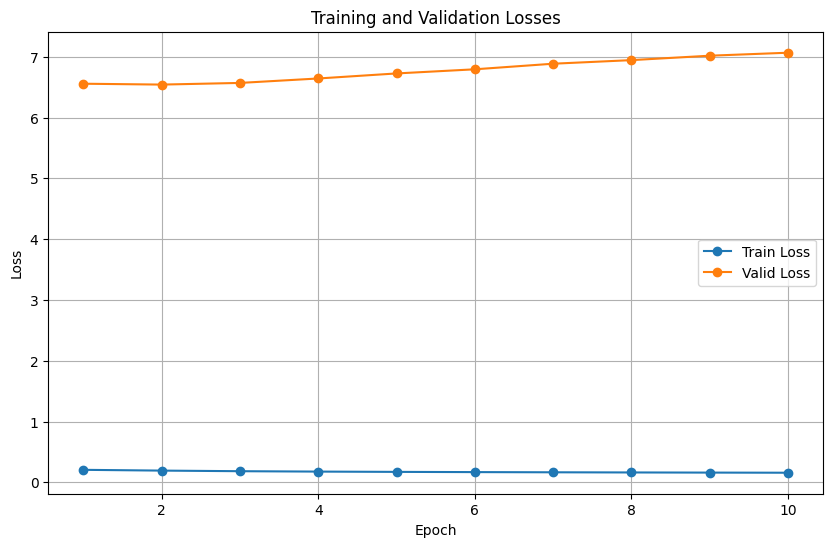

In [94]:
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt  # Import Matplotlib

# Check if a GPU is available, and if not, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move your model and optimizer to the GPU
model.to(device)
optimizer = torch.optim.Adam(model.parameters())

# Split your data into training and validation sets
split_ratio = 0.9  # Adjust as needed
split_idx = int(len(selected_pairs) * split_ratio)
train_pairs = selected_pairs[:split_idx]
valid_pairs = selected_pairs[split_idx:]

# Define your batch size
batch_size = 32

# Lists to store training and validation loss values
train_losses = []
valid_losses = []

# Training loop
epochs = 10  # Adjust the number of epochs as needed
for epoch in range(epochs):
    total_loss = 0

    # Create data loaders for the training and validation sets
    train_inputs, train_targets = zip(*train_pairs)
    train_inputs = torch.tensor(train_inputs, dtype=torch.long).to(device)
    train_targets = torch.tensor(train_targets, dtype=torch.long).to(device)

    train_data = TensorDataset(train_inputs, train_targets)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

    valid_inputs, valid_targets = zip(*valid_pairs)
    valid_inputs = torch.tensor(valid_inputs, dtype=torch.long).to(device)
    valid_targets = torch.tensor(valid_targets, dtype=torch.long).to(device)

    valid_data = TensorDataset(valid_inputs, valid_targets)
    valid_loader = DataLoader(valid_data, batch_size=batch_size)

    # Training
    model.train()
    for batch_inputs, batch_targets in train_loader:
        optimizer.zero_grad()

        # Forward pass for forward prediction (mode 1)
        forward_output = model(batch_inputs, mode=1)
        # Calculate the loss for forward prediction
        loss = criterion(forward_output.view(-1, vocab_size), batch_targets.view(-1))

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Validation
    model.eval()
    with torch.no_grad():
        valid_loss = 0
        num_batches = 0

        for batch_inputs, batch_targets in valid_loader:
            # Forward pass for forward prediction (mode 1)
            forward_output = model(batch_inputs, mode=1)
            # Calculate the loss for forward prediction
            loss = criterion(forward_output.view(-1, vocab_size), batch_targets.view(-1))

            valid_loss += loss.item()
            num_batches += 1

        avg_valid_loss = valid_loss / num_batches

    # Append the training and validation loss values to the lists
    train_losses.append(total_loss / len(train_pairs))
    valid_losses.append(avg_valid_loss)

    # Update the progress bar description with the current losses
    progress_description = f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Valid Loss: {valid_losses[-1]:.4f}"
    tqdm.write(progress_description)

# Plotting the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), valid_losses, label='Valid Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid()
plt.show()


now training of backward model

In [95]:
# Define the percentage of data to use (e.g., 10%)
data_percentage = 0.1

# Calculate the number of samples to use
num_samples = int(len(input_target_pairs_rev) * data_percentage)

# Randomly select a subset of input_target_pairs
random.seed(42)  # Set a random seed for reproducibility
selected_pairs_rev = random.sample(input_target_pairs_rev, num_samples)

Epoch 1/10, Train Loss: 0.2370, Valid Loss: 7.1270
Epoch 2/10, Train Loss: 0.2101, Valid Loss: 6.9346
Epoch 3/10, Train Loss: 0.1980, Valid Loss: 6.9030
Epoch 4/10, Train Loss: 0.1891, Valid Loss: 6.9100
Epoch 5/10, Train Loss: 0.1818, Valid Loss: 6.9247
Epoch 6/10, Train Loss: 0.1756, Valid Loss: 7.0027
Epoch 7/10, Train Loss: 0.1706, Valid Loss: 7.0527
Epoch 8/10, Train Loss: 0.1665, Valid Loss: 7.1385
Epoch 9/10, Train Loss: 0.1631, Valid Loss: 7.2082
Epoch 10/10, Train Loss: 0.1603, Valid Loss: 7.2839


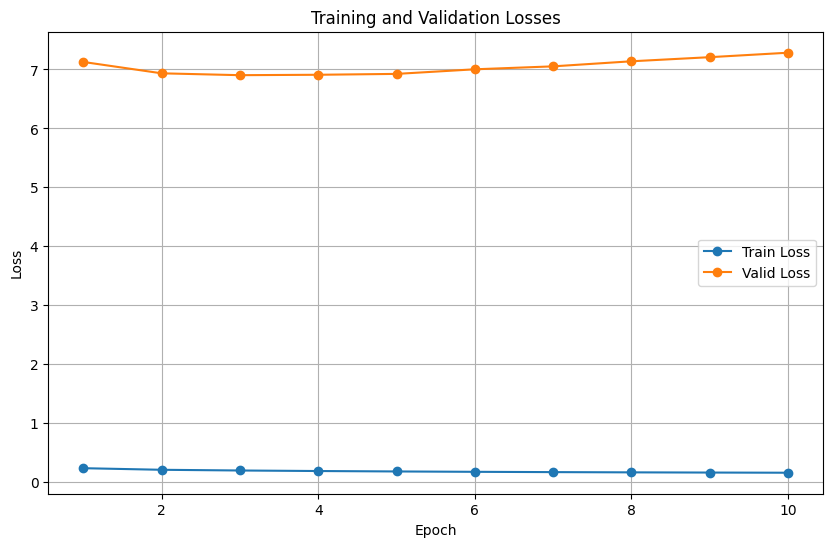

In [96]:
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt  # Import Matplotlib

# Check if a GPU is available, and if not, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move your model and optimizer to the GPU
model.to(device)
optimizer = torch.optim.Adam(model.parameters())

# Split your data into training and validation sets
split_ratio = 0.9  # Adjust as needed
split_idx = int(len(selected_pairs_rev) * split_ratio)
train_pairs = selected_pairs_rev[:split_idx]
valid_pairs = selected_pairs_rev[split_idx:]

# Define your batch size
batch_size = 32

# Lists to store training and validation loss values
train_losses = []
valid_losses = []

# Training loop
epochs = 10  # Adjust the number of epochs as needed
for epoch in range(epochs):
    total_loss = 0

    # Create data loaders for the training and validation sets
    train_inputs, train_targets = zip(*train_pairs)
    train_inputs = torch.tensor(train_inputs, dtype=torch.long).to(device)
    train_targets = torch.tensor(train_targets, dtype=torch.long).to(device)

    train_data = TensorDataset(train_inputs, train_targets)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

    valid_inputs, valid_targets = zip(*valid_pairs)
    valid_inputs = torch.tensor(valid_inputs, dtype=torch.long).to(device)
    valid_targets = torch.tensor(valid_targets, dtype=torch.long).to(device)

    valid_data = TensorDataset(valid_inputs, valid_targets)
    valid_loader = DataLoader(valid_data, batch_size=batch_size)

    # Training
    model.train()
    for batch_inputs, batch_targets in train_loader:
        optimizer.zero_grad()

        # Forward pass for forward prediction (mode 1)
        forward_output = model(batch_inputs, mode=2)
        # Calculate the loss for forward prediction
        loss = criterion(forward_output.view(-1, vocab_size), batch_targets.view(-1))

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Validation
    model.eval()
    with torch.no_grad():
        valid_loss = 0
        num_batches = 0

        for batch_inputs, batch_targets in valid_loader:
            # Forward pass for forward prediction (mode 1)
            forward_output = model(batch_inputs, mode=2)
            # Calculate the loss for forward prediction
            loss = criterion(forward_output.view(-1, vocab_size), batch_targets.view(-1))

            valid_loss += loss.item()
            num_batches += 1

        avg_valid_loss = valid_loss / num_batches

    # Append the training and validation loss values to the lists
    train_losses.append(total_loss / len(train_pairs))
    valid_losses.append(avg_valid_loss)

    # Update the progress bar description with the current losses
    progress_description = f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Valid Loss: {avg_valid_loss:.4f}"
    tqdm.write(progress_description)

# Plotting the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), valid_losses, label='Valid Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid()
plt.show()


for elmo

In [97]:
# Define the percentage of data to use (e.g., 10%)
data_percentage = 1

# Calculate the number of samples to use
num_samples = int(len(elmo) * data_percentage)

# Randomly select a subset of input_target_pairs
random.seed(42)  # Set a random seed for reproducibility
selected_pairs_elmo = random.sample(elmo, num_samples)

In [98]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Epoch 10/10, Loss: 0.3562, Accuracy: 0.8917, F1 (micro): 0.8917: 100%|██████████| 10/10 [00:42<00:00,  4.22s/it]


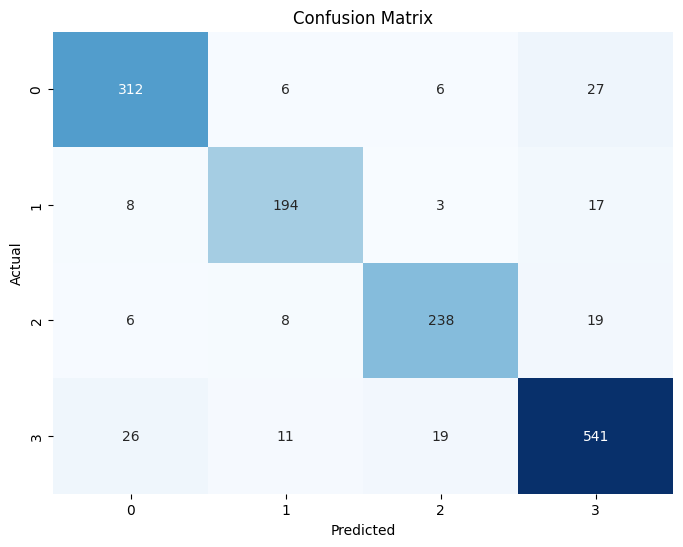

In [99]:
from tqdm import tqdm
import torch
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Check if a GPU is available, and if not, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move your model and optimizer to the GPU
model.to(device)
optimizer = torch.optim.Adam(model.parameters())

# Create a progress bar
progress_bar = tqdm(range(epochs), desc="Training")

# Create a data structure to store metrics
metrics_data = []

# Training loop
for epoch in progress_bar:
    total_loss = 0
    all_predicted = []
    all_targets = []

    for input_indices, target_index in selected_pairs_elmo:
        # Move tensors to the GPU
        input_indices = torch.tensor(input_indices, dtype=torch.long).to(device)
        target_index = torch.tensor(int(target_index), dtype=torch.long).to(device)

        optimizer.zero_grad()

        # Forward pass for forward prediction (mode 3)
        forward_output = model(input_indices, mode=3)
        # Calculate the loss for forward prediction
        loss = criterion(forward_output, target_index - 1)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Convert the forward output to class predictions
        _, predicted = torch.max(forward_output, dim=0)

        # Ensure predicted is a Python integer
        predicted = int(predicted)
        all_predicted.append(predicted + 1)  # Append to the list
        all_targets.append(int(target_index.cpu().numpy()))  # Move to CPU and convert to NumPy

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(all_targets, all_predicted)
    f1_micro = f1_score(all_targets, all_predicted, average='micro')

    # Calculate confusion matrix
    confusion = confusion_matrix(all_targets, all_predicted)

    # Store metrics for this epoch
    metrics_data.append({'Epoch': epoch + 1, 'Loss': total_loss / len(selected_pairs_elmo), 'Accuracy': accuracy, 'F1 (micro)': f1_micro})

    # Update the progress bar description
    progress_bar.set_description(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(selected_pairs_elmo):.4f}, Accuracy: {accuracy:.4f}, F1 (micro): {f1_micro:.4f}")

# Close the progress bar
progress_bar.close()

# Create a table from metrics_data and save as a CSV
metrics_df = pd.DataFrame(metrics_data)
metrics_df.to_csv('metrics.csv', index=False)

# Create a colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Epoch 10/10, Train Loss: 0.1235, Dev Loss: 1.8329, Train Accuracy: 0.9731, Dev Accuracy: 0.6090: 100%|██████████| 10/10 [00:39<00:00,  3.97s/it]


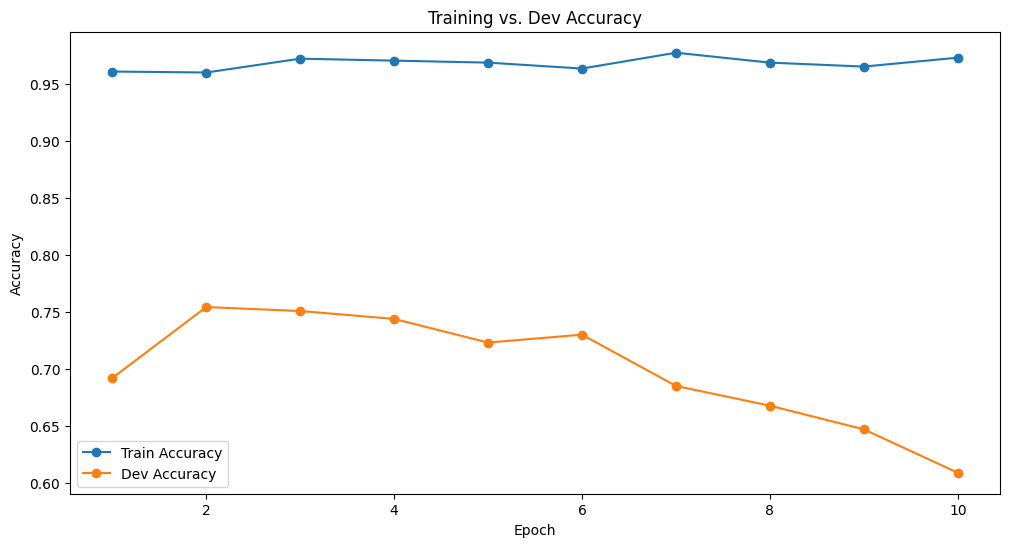

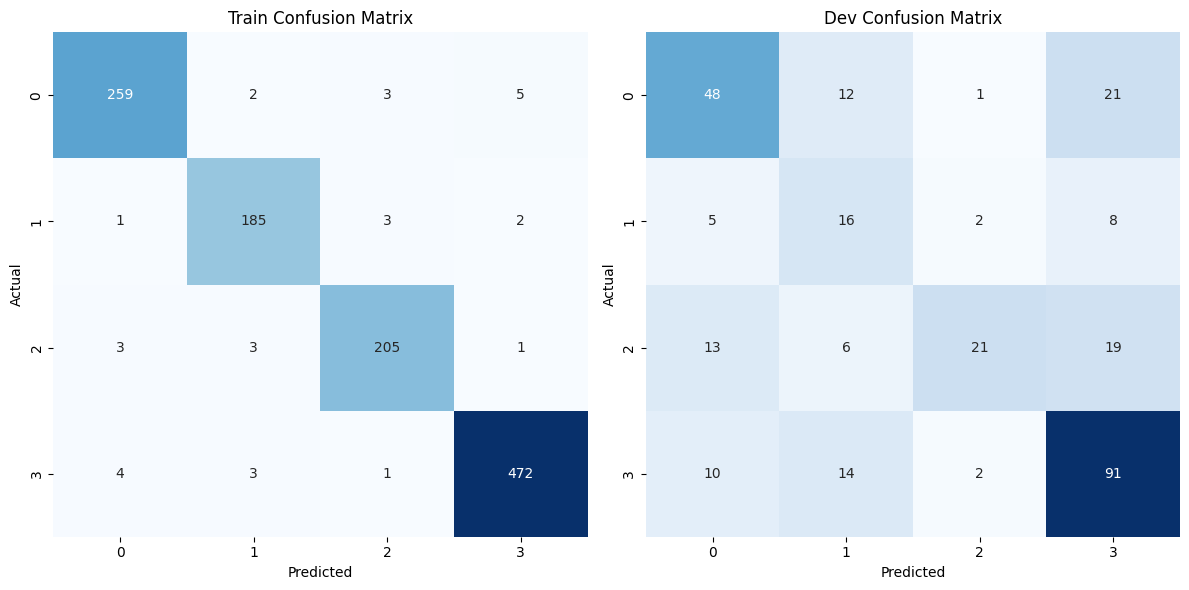

In [102]:
from tqdm import tqdm
import torch
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Check if a GPU is available, and if not, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move your model and optimizer to the GPU
model.to(device)
optimizer = torch.optim.Adam(model.parameters())

# Create a progress bar
progress_bar = tqdm(range(epochs), desc="Training")

# Create a data structure to store metrics for training and dev
train_metrics_data = []
dev_metrics_data = []

# Create a list to store confusion matrices
train_confusion_matrices = []
dev_confusion_matrices = []

# Separate your dataset into training and dev datasets
train_size = int(0.8 * len(selected_pairs_elmo))  # Use 80% for training, 20% for dev
train_pairs = selected_pairs_elmo[:train_size]
dev_pairs = selected_pairs_elmo[train_size:]

# Training loop
for epoch in progress_bar:
    # Training
    model.train()
    total_loss = 0
    all_predicted = []
    all_targets = []

    for input_indices, target_index in train_pairs:
        # Move tensors to the GPU
        input_indices = torch.tensor(input_indices, dtype=torch.long).to(device)
        target_index = torch.tensor(int(target_index), dtype=torch.long).to(device)

        optimizer.zero_grad()

        # Forward pass for forward prediction (mode 3)
        forward_output = model(input_indices, mode=3)
        # Calculate the loss for forward prediction
        loss = criterion(forward_output, target_index - 1)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Convert the forward output to class predictions
        _, predicted = torch.max(forward_output, dim=0)

        # Ensure predicted is a Python integer
        predicted = int(predicted)
        all_predicted.append(predicted + 1)  # Append to the list
        all_targets.append(int(target_index.cpu().numpy()))  # Move to CPU and convert to NumPy

    # Calculate accuracy and F1 score for training
    train_accuracy = accuracy_score(all_targets, all_predicted)
    train_f1_micro = f1_score(all_targets, all_predicted, average='micro')

    # Calculate confusion matrix for training
    train_confusion = confusion_matrix(all_targets, all_predicted)
    train_confusion_matrices.append(train_confusion)

    # Store metrics for training
    train_metrics_data.append({'Epoch': epoch + 1, 'Loss': total_loss / len(train_pairs), 'Accuracy': train_accuracy, 'F1 (micro)': train_f1_micro})

    # Development (Dev)
    model.eval()
    total_loss = 0
    all_predicted = []
    all_targets = []

    for input_indices, target_index in dev_pairs:
        # Move tensors to the GPU
        input_indices = torch.tensor(input_indices, dtype=torch.long).to(device)
        target_index = torch.tensor(int(target_index), dtype=torch.long).to(device)

        # Forward pass for forward prediction (mode 3)
        forward_output = model(input_indices, mode=3)
        # Calculate the loss for forward prediction
        loss = criterion(forward_output, target_index - 1)

        total_loss += loss.item()

        # Convert the forward output to class predictions
        _, predicted = torch.max(forward_output, dim=0)

        # Ensure predicted is a Python integer
        predicted = int(predicted)
        all_predicted.append(predicted + 1)  # Append to the list
        all_targets.append(int(target_index.cpu().numpy()))  # Move to CPU and convert to NumPy

    # Calculate accuracy and F1 score for dev
    dev_accuracy = accuracy_score(all_targets, all_predicted)
    dev_f1_micro = f1_score(all_targets, all_predicted, average='micro')

    # Calculate confusion matrix for dev
    dev_confusion = confusion_matrix(all_targets, all_predicted)
    dev_confusion_matrices.append(dev_confusion)

    # Store metrics for dev
    dev_metrics_data.append({'Epoch': epoch + 1, 'Loss': total_loss / len(dev_pairs), 'Accuracy': dev_accuracy, 'F1 (micro)': dev_f1_micro})

    # Update the progress bar description
    progress_bar.set_description(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_metrics_data[-1]['Loss']:.4f}, Dev Loss: {dev_metrics_data[-1]['Loss']:.4f}, Train Accuracy: {train_accuracy:.4f}, Dev Accuracy: {dev_accuracy:.4f}")

# Close the progress bar
progress_bar.close()

# Create dataframes from metrics data
train_metrics_df = pd.DataFrame(train_metrics_data)
dev_metrics_df = pd.DataFrame(dev_metrics_data)

# Save metrics as CSV
train_metrics_df.to_csv('train_metrics.csv', index=False)
dev_metrics_df.to_csv('dev_metrics.csv', index=False)

# Plot training and dev accuracy over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_metrics_df['Epoch'], train_metrics_df['Accuracy'], label='Train Accuracy', marker='o')
plt.plot(dev_metrics_df['Epoch'], dev_metrics_df['Accuracy'], label='Dev Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Dev Accuracy')
plt.legend()
plt.show()

# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Train Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(dev_confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Dev Confusion Matrix')

plt.tight_layout()
plt.show()


In [100]:
import torch

# Define your model
# Replace 'YourModelClass' with the actual class name of your model
# model = YourModelClass(...)  # Instantiate your model here

# Define the file path where you want to save the model
file_path = 'after.pt'

# Save the model to the specified file
torch.save(model.state_dict(), file_path)

print(f"Model saved to {file_path}")

Model saved to after.pt


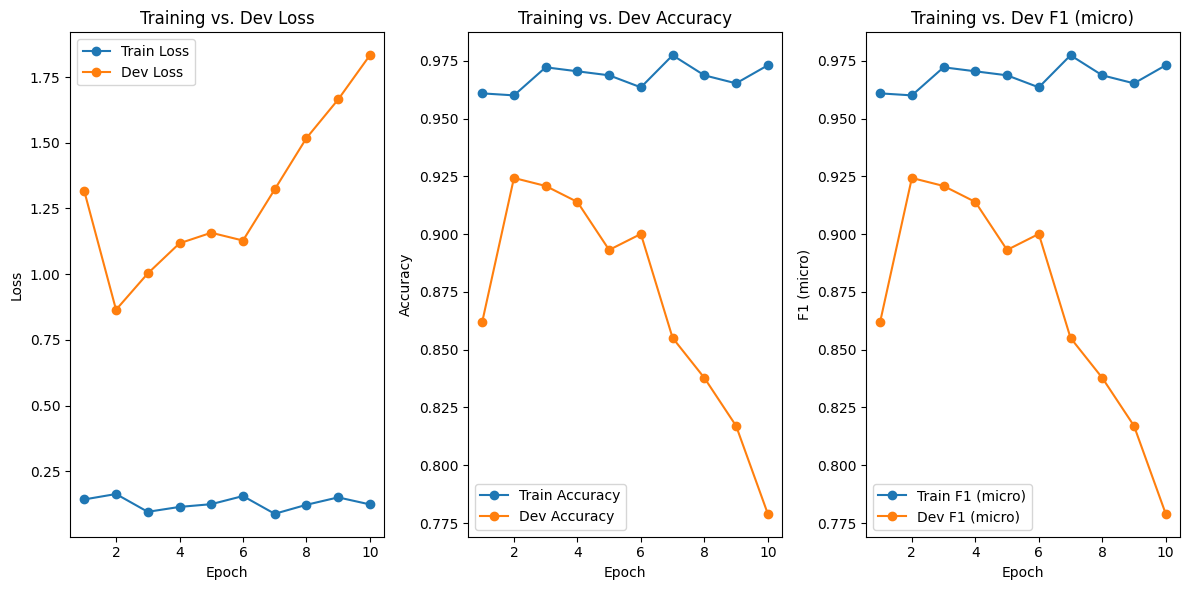

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training and dev metrics CSV files
train_metrics = pd.read_csv('/kaggle/input/metric/train_metrics.csv')
dev_metrics = pd.read_csv('/kaggle/input/metric/dev_metrics.csv')

# Extract data for plotting
epochs = train_metrics['Epoch']
train_loss = train_metrics['Loss']
train_accuracy = train_metrics['Accuracy']
train_f1_micro = train_metrics['F1 (micro)']

dev_loss = dev_metrics['Loss']
dev_accuracy = dev_metrics['Accuracy']
dev_f1_micro = dev_metrics['F1 (micro)']

# Create comparative plots
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 3, 1)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, dev_loss, label='Dev Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Dev Loss')
plt.legend()

# Accuracy
plt.subplot(1, 3, 2)
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, dev_accuracy, label='Dev Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Dev Accuracy')
plt.legend()

# F1 (micro)
plt.subplot(1, 3, 3)
plt.plot(epochs, train_f1_micro, label='Train F1 (micro)', marker='o')
plt.plot(epochs, dev_f1_micro, label='Dev F1 (micro)', marker='o')
plt.xlabel('Epoch')
plt.ylabel('F1 (micro)')
plt.title('Training vs. Dev F1 (micro)')
plt.legend()

plt.tight_layout()
plt.show()
